In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [75]:
def feature_eng(train_df,test_df):

    joint_df=train_df.append(test_df)
    exp=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
    joint_df['TotalExpense']=joint_df[exp].sum(axis=1)
    #separate deck/cabin number/port-starboard
    #separate 


In [76]:
joint_df=train.append(test)
joint_df[:3]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [78]:
label='Transported'
features=list(train.keys())
features.remove(label)
features.remove('PassengerId')
print(features)

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name']


In [79]:
numeric_features=['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
categorical_features=['CryoSleep','VIP','Destination']
#TODO: 'Cabin', 'Name'

In [80]:
def plot_survival(f,log=False,bins=None):
        # Get the variable to examine
        transported = train[train[label]==1][f]
        not_transported = train[train[label]==0][f]
        # Plot a histogram
        plt.hist([transported,not_transported],label=['transported', 'not_transported'],log=log,bins=bins)

        # Add titles and labels
        plt.title(f)
        plt.xlabel(f)
        plt.legend()
        plt.ylabel('Number')
        plt.show()

https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/

https://medium.com/analytics-vidhya/create-a-grouped-bar-chart-with-matplotlib-and-pandas-9b021c97e0a

In [ ]:
f='Destination'
grouped=train.groupby(f)


In [130]:
train[train['Cabin'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
93,0101_01,Mars,True,NaN,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Book Trad,True
103,0110_01,Europa,False,NaN,TRAPPIST-1e,32.0,False,0.0,410.0,6.0,3929.0,764.0,Graviph Aloubtled,False
222,0239_01,Mars,False,NaN,TRAPPIST-1e,37.0,False,637.0,0.0,0.0,92.0,319.0,Diedow Resty,False
227,0244_01,Mars,True,NaN,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Froos Sad,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8209,8772_02,Europa,False,NaN,55 Cancri e,53.0,False,0.0,1127.0,0.0,3939.0,NaN,Naosura Motled,False
8475,9057_01,Europa,False,NaN,55 Cancri e,36.0,True,132.0,3479.0,0.0,3786.0,0.0,Coxan Statch,False
8485,9069_03,Europa,True,NaN,55 Cancri e,25.0,False,0.0,0.0,0.0,0.0,0.0,Bath Brakeng,True
8509,9081_03,Earth,True,NaN,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Beula Clemondsey,False


In [118]:
train[train.isna().any(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True


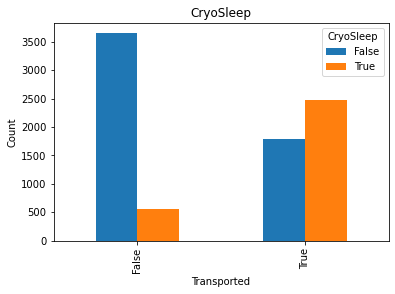

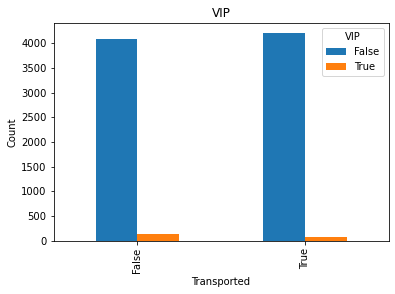

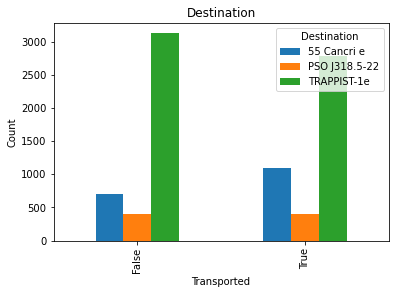

In [129]:
for f in categorical_features:
    df_pivot = pd.pivot_table(
        train, 
        #values="Cabin",
        index="Transported",
        columns=f,
        aggfunc='size'
    )
    ax = df_pivot.plot(kind="bar")
    ax.set_title(f)
    ax.set_ylabel('Count')

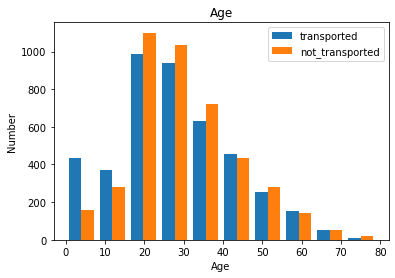

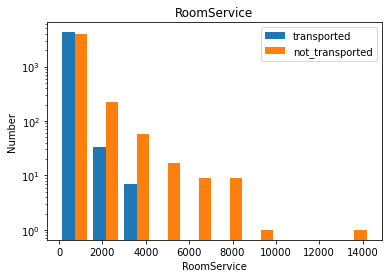

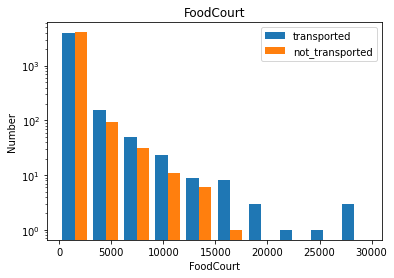

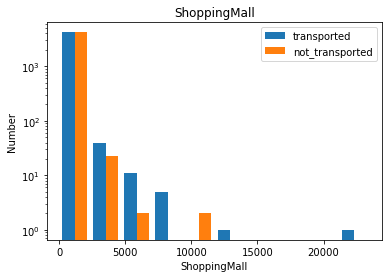

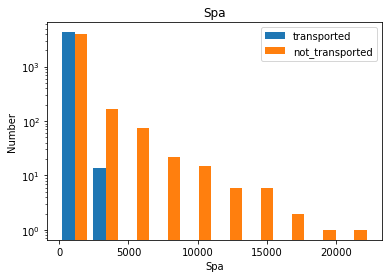

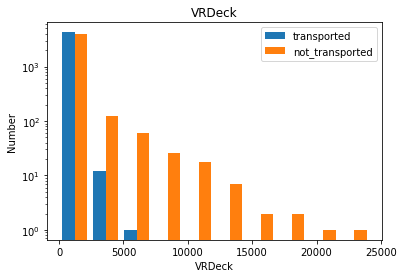

In [82]:
for f in numeric_features:
    if f == 'Age':
        plot_survival(f)
    else:
        plot_survival(f,log=True)

In [83]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.model_selection import GridSearchCV

In [84]:
binned_features=[]

In [85]:
params = [
 {
    'clf':[RandomForestClassifier()],
    'clf__n_estimators' : [25,50, 100, 150,200]
 },
 {
   'clf':[AdaBoostClassifier()],
   'clf__learning_rate':[0.03,0.1, 0.5, 1.0],
   'clf__n_estimators' : [25,50, 100, 150,200,300]
 }
 ]

In [86]:
y=train[label]
x=train.drop(label,axis=1)

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)


In [88]:
# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_transformer = Pipeline(steps=[('inp',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode the Age column)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

binned_transformer = Pipeline(steps=[('inp',SimpleImputer(strategy='mean')),('KBinsDiscretizer',KBinsDiscretizer(n_bins=10))])


# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('bin',binned_transformer,binned_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('clf', RandomForestClassifier(n_estimators=100))])

In [89]:
set_config(display='diagram')
gridsearch=GridSearchCV(verbose=1,estimator=pipeline,param_grid=params,scoring='accuracy',return_train_score=True,cv=3)


In [90]:
model = gridsearch.fit(x_train, (y_train))

Fitting 3 folds for each of 29 candidates, totalling 87 fits


In [91]:
gridsearch.best_score_

0.7932898621021433

In [92]:
gridsearch.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('inp',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['CryoSleep', 'VIP',
                                                   'Destination']),
                                                 ('bin',
                                                  Pipeline(steps=[('inp',
                                                                   SimpleImputer()),
                                                                  ('KBinsDiscretizer',
                                                                   KBinsDiscretizer(n_bins=10))]),
                                                  [])])),
                ('clf',
                 AdaBoostClassifier(learning_rate=0.1, n_estimators=100))])

In [93]:
from sklearn.metrics import roc_auc_score,precision_score, recall_score, accuracy_score,roc_curve,confusion_matrix

Confusion Matrix:
 [[1326  401]
 [ 338 1413]] 

Accuracy: 0.7875215641173088
Overall Precision: 0.778941565600882
Overall Recall: 0.806967447173044

AUC: 0.8487865483103871


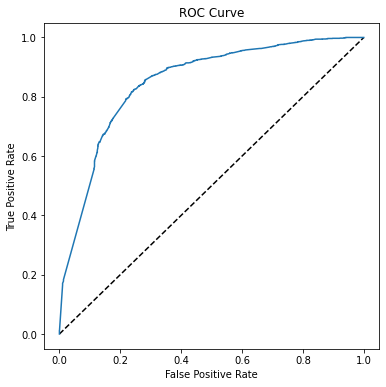

In [94]:
predictions = model.predict(x_test)
y_scores = model.predict_proba(x_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [95]:
chall_predictions=model.predict(test)
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [96]:
chall_predictions

array([ True, False,  True, ...,  True,  True,  True])

In [97]:
sample=pd.DataFrame(test['PassengerId'])
sample['Transported'] = chall_predictions.tolist()
sample.to_csv('chall_predictions.csv',index=False)
sample

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
